Dataset shape: (25, 7)

First few rows:
   Run  Factor A  Factor B  Factor C  Factor D  Response 1 (Experimental)  \
0    1       110         7        50        10                    1127.19   
1    2        85        13        50        10                    1024.97   
2    3       101         1       500        60                    1950.00   
3    4       101         1       500        60                    2223.17   
4    5        50        10        50        10                    1845.60   

   Response 2 (Experimental)  
0                    1321.65  
1                    1339.35  
2                    2878.90  
3                    2989.00  
4                    2690.50  

MATLAB EQUIVALENT EXAMPLES

1. Using all factors (A,B,C,D) to predict Response 1:
Linear Regression Model Summary
R-squared: 0.6348
Adjusted R-squared: 0.5617
RMSE: 632.9353
Degrees of Freedom: 20

Coefficients:
----------------------------------------------------------------------
Variable        Estimate   

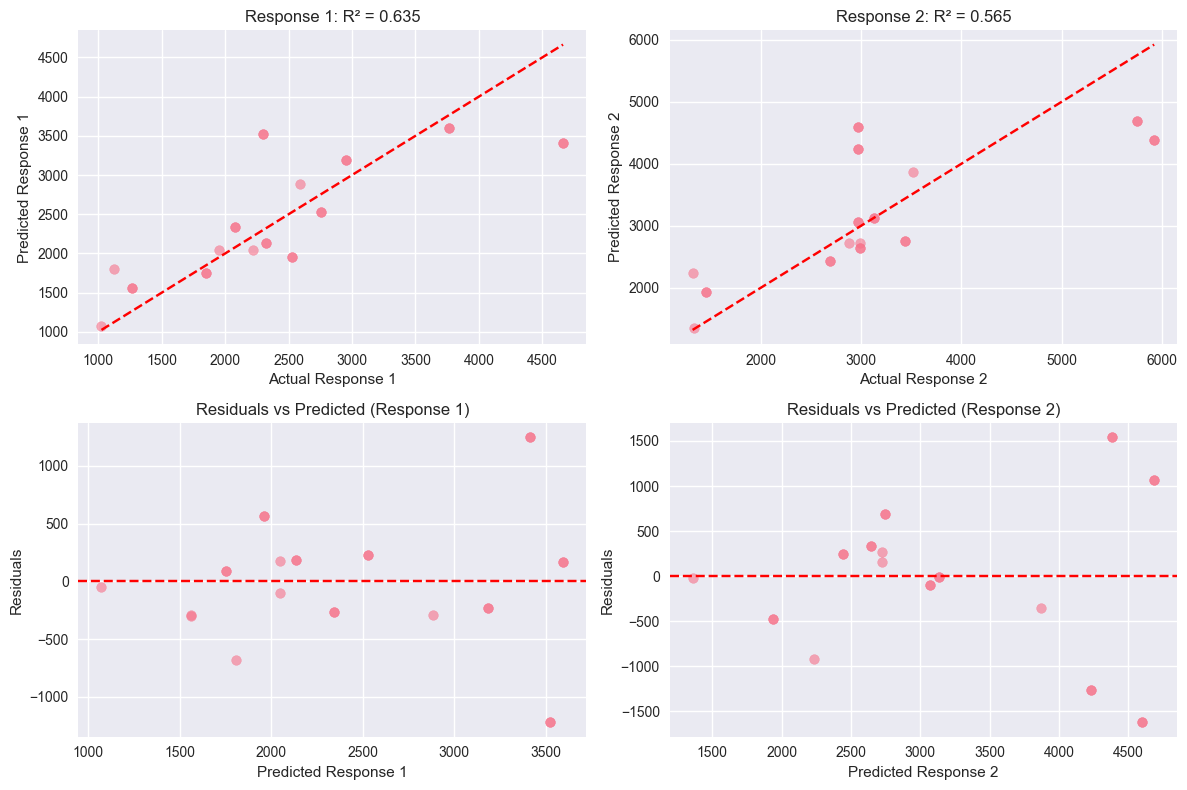


MATLAB TO PYTHON SYNTAX SUMMARY

MATLAB                          →  Python
--------------------------------   ----------------------------------
mdl = fitlm(tbl)               →  mdl = fitlm(tbl)
mdl = fitlm(tbl,ResponseVar)   →  mdl = fitlm(tbl, response_var='ResponseVar')
mdl = fitlm(X,y)               →  mdl = fitlm(X, y)
ypred = predict(mdl,Xnew)      →  ypred, _ = mdl.predict(Xnew)
[ypred,yci] = predict(mdl,Xnew)→  ypred, yci = mdl.predict(Xnew)

Model properties:
mdl.Rsquared.Ordinary          →  mdl.r2
mdl.Rsquared.Adjusted          →  mdl.adj_r2
mdl.RMSE                       →  mdl.rmse
mdl.Coefficients               →  mdl.coefficients



In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = """Run	Factor A	Factor B	Factor C	Factor D	Response 1 (Experimental)	Response 2 (Experimental)
1	110	7	50	10	1127.19	1321.65
2	85	13	50	10	1024.97	1339.35
3	101	1	500	60	1950.00	2878.90
4	101	1	500	60	2223.17	2989.00
5	50	10	50	10	1845.60	2690.50
6	50	10	50	10	1846.18	2689.91
7	70	10	208	60	2073.90	2974.51
8	70	10	208	60	2074.517	2970.82
9	85	1	223	60	2298.62	2972.98
10	85	1	223	60	2298.65	2972.94
11	101	10	208	60	2322.86	2987.28
12	101	10	208	60	2322.83	2987.31
13	110	7	208	60	2752.80	3129.61
14	110	7	208	60	2752.84	3129.57
15	50	7	100	10	2525.27	3441.19
16	50	7	100	10	2525.91	3440.43
17	85	1	208	60	3762.88	5752.81
18	85	1	208	60	3764.53	5752.15
19	101	1	223	60	4663.04	5921.49
20	101	1	223	60	4663.77	5921.61
21	110	7	100	10	1264.44	1456.22
22	110	7	100	10	1265.88	1458.13
23	70	3	250	60	2951.90	2965.54
24	70	3	250	60	2955.83	2966.91
25	70	3	311	60	2590.79	3517.86"""

# Parse the data
from io import StringIO
tbl = pd.read_csv(StringIO(data), sep='\t')
print("Dataset shape:", tbl.shape)
print("\nFirst few rows:")
print(tbl.head())

# ==============================================================================
# MATLAB EQUIVALENT FUNCTIONS
# ==============================================================================

class LinearRegressionModel:
    """Python equivalent of MATLAB's fitlm model object"""
    
    def __init__(self, X, y, feature_names=None):
        self.X = np.array(X)
        self.y = np.array(y)
        self.feature_names = feature_names if feature_names else [f'X{i+1}' for i in range(X.shape[1])]
        
        # Fit the model
        self.model = LinearRegression()
        self.model.fit(self.X, self.y)
        
        # Calculate additional statistics
        self.y_pred = self.model.predict(self.X)
        self.residuals = self.y - self.y_pred
        self.n = len(self.y)
        self.p = self.X.shape[1] + 1  # +1 for intercept
        
        # R-squared
        self.r2 = r2_score(self.y, self.y_pred)
        self.adj_r2 = 1 - (1 - self.r2) * (self.n - 1) / (self.n - self.p)
        
        # Standard errors and t-statistics
        self._calculate_statistics()
        
    def _calculate_statistics(self):
        """Calculate standard errors, t-statistics, and p-values"""
        # Add intercept column to X for calculations
        X_with_intercept = np.column_stack([np.ones(self.n), self.X])
        
        # Calculate residual standard error
        mse = np.sum(self.residuals**2) / (self.n - self.p)
        self.rmse = np.sqrt(mse)
        
        # Covariance matrix
        try:
            cov_matrix = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept)
            self.std_errors = np.sqrt(np.diag(cov_matrix))
            
            # Coefficients (intercept + slopes)
            self.coefficients = np.concatenate([[self.model.intercept_], self.model.coef_])
            
            # t-statistics
            self.t_stats = self.coefficients / self.std_errors
            
            # p-values (two-tailed test)
            self.p_values = 2 * (1 - stats.t.cdf(np.abs(self.t_stats), self.n - self.p))
            
        except np.linalg.LinAlgError:
            print("Warning: Could not calculate standard errors (singular matrix)")
            self.std_errors = np.full(self.p, np.nan)
            self.t_stats = np.full(self.p, np.nan)
            self.p_values = np.full(self.p, np.nan)
    
    def summary(self):
        """Print model summary similar to MATLAB's fitlm output"""
        print("Linear Regression Model Summary")
        print("=" * 50)
        print(f"R-squared: {self.r2:.4f}")
        print(f"Adjusted R-squared: {self.adj_r2:.4f}")
        print(f"RMSE: {self.rmse:.4f}")
        print(f"Degrees of Freedom: {self.n - self.p}")
        print("\nCoefficients:")
        print("-" * 70)
        print(f"{'Variable':<15} {'Estimate':<12} {'SE':<12} {'t-Stat':<12} {'p-Value':<12}")
        print("-" * 70)
        
        # Intercept
        print(f"{'Intercept':<15} {self.coefficients[0]:<12.4f} {self.std_errors[0]:<12.4f} "
              f"{self.t_stats[0]:<12.4f} {self.p_values[0]:<12.4f}")
        
        # Other coefficients
        for i, name in enumerate(self.feature_names):
            print(f"{name:<15} {self.coefficients[i+1]:<12.4f} {self.std_errors[i+1]:<12.4f} "
                  f"{self.t_stats[i+1]:<12.4f} {self.p_values[i+1]:<12.4f}")
    
    def predict(self, X_new, alpha=0.05):
        """
        Python equivalent of MATLAB's predict function
        Returns predictions and confidence intervals
        """
        X_new = np.array(X_new)
        if X_new.ndim == 1:
            X_new = X_new.reshape(1, -1)
            
        # Predictions
        y_pred = self.model.predict(X_new)
        
        # Confidence intervals
        X_new_with_intercept = np.column_stack([np.ones(X_new.shape[0]), X_new])
        X_with_intercept = np.column_stack([np.ones(self.n), self.X])
        
        try:
            # Prediction variance
            mse = np.sum(self.residuals**2) / (self.n - self.p)
            cov_matrix = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept)
            
            pred_var = np.diag(X_new_with_intercept @ cov_matrix @ X_new_with_intercept.T)
            pred_se = np.sqrt(pred_var)
            
            # Critical t-value
            t_crit = stats.t.ppf(1 - alpha/2, self.n - self.p)
            
            # Confidence intervals
            ci_lower = y_pred - t_crit * pred_se
            ci_upper = y_pred + t_crit * pred_se
            
            return y_pred, np.column_stack([ci_lower, ci_upper])
            
        except np.linalg.LinAlgError:
            print("Warning: Could not calculate confidence intervals")
            return y_pred, None

# ==============================================================================
# MATLAB SYNTAX EQUIVALENTS
# ==============================================================================

def fitlm(tbl_or_X, y=None, response_var=None):
    """
    Python equivalent of MATLAB's fitlm function
    
    Usage:
    - fitlm(tbl) - uses all columns except last as predictors
    - fitlm(tbl, response_var) - specify response variable name
    - fitlm(X, y) - direct X and y arrays
    """
    
    if y is None and response_var is None:
        # Case: fitlm(tbl) - assume last column is response
        if isinstance(tbl_or_X, pd.DataFrame):
            X = tbl_or_X.iloc[:, :-1]
            y = tbl_or_X.iloc[:, -1]
            feature_names = X.columns.tolist()
        else:
            raise ValueError("If y is None, first argument must be a DataFrame")
            
    elif y is None and response_var is not None:
        # Case: fitlm(tbl, ResponseVarName)
        if isinstance(tbl_or_X, pd.DataFrame):
            y = tbl_or_X[response_var]
            X = tbl_or_X.drop(columns=[response_var])
            feature_names = X.columns.tolist()
        else:
            raise ValueError("If response_var is specified, first argument must be a DataFrame")
            
    else:
        # Case: fitlm(X, y)
        X = tbl_or_X
        feature_names = None
        if isinstance(X, pd.DataFrame):
            feature_names = X.columns.tolist()
    
    return LinearRegressionModel(X, y, feature_names)

# ==============================================================================
# EXAMPLES WITH YOUR DATA
# ==============================================================================

print("\n" + "="*60)
print("MATLAB EQUIVALENT EXAMPLES")
print("="*60)

# Example 1: mdl = fitlm(tbl) - using all factors to predict Response 1
print("\n1. Using all factors (A,B,C,D) to predict Response 1:")
X1 = tbl[['Factor A', 'Factor B', 'Factor C', 'Factor D']]
y1 = tbl['Response 1 (Experimental)']
mdl1 = fitlm(X1, y1)
mdl1.summary()

# Example 2: mdl = fitlm(tbl, ResponseVarName) - predict Response 2
print("\n2. Using all factors to predict Response 2:")
# Create full dataframe for this example
full_data = tbl[['Factor A', 'Factor B', 'Factor C', 'Factor D', 'Response 2 (Experimental)']]
mdl2 = fitlm(full_data, response_var='Response 2 (Experimental)')
mdl2.summary()

# Example 3: Predictions - ypred = predict(mdl, Xnew)
print("\n3. Making predictions with confidence intervals:")
# New data points for prediction
X_new = np.array([[100, 5, 200, 40],
                  [80, 10, 300, 50]])

y_pred, y_ci = mdl1.predict(X_new)
print(f"Predictions for new data:")
for i, (pred, ci) in enumerate(zip(y_pred, y_ci)):
    print(f"  Point {i+1}: {pred:.2f} [CI: {ci[0]:.2f}, {ci[1]:.2f}]")

# Example 4: Model comparison
print("\n4. Quick model comparison:")
print(f"Response 1 model R²: {mdl1.r2:.4f}")
print(f"Response 2 model R²: {mdl2.r2:.4f}")

# Example 5: Visualization
plt.figure(figsize=(12, 8))

# Plot 1: Response 1 predictions vs actual
plt.subplot(2, 2, 1)
plt.scatter(mdl1.y, mdl1.y_pred, alpha=0.6)
plt.plot([mdl1.y.min(), mdl1.y.max()], [mdl1.y.min(), mdl1.y.max()], 'r--')
plt.xlabel('Actual Response 1')
plt.ylabel('Predicted Response 1')
plt.title(f'Response 1: R² = {mdl1.r2:.3f}')

# Plot 2: Response 2 predictions vs actual  
plt.subplot(2, 2, 2)
plt.scatter(mdl2.y, mdl2.y_pred, alpha=0.6)
plt.plot([mdl2.y.min(), mdl2.y.max()], [mdl2.y.min(), mdl2.y.max()], 'r--')
plt.xlabel('Actual Response 2')
plt.ylabel('Predicted Response 2')
plt.title(f'Response 2: R² = {mdl2.r2:.3f}')

# Plot 3: Residuals Response 1
plt.subplot(2, 2, 3)
plt.scatter(mdl1.y_pred, mdl1.residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Response 1')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Response 1)')

# Plot 4: Residuals Response 2
plt.subplot(2, 2, 4)
plt.scatter(mdl2.y_pred, mdl2.residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Response 2')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Response 2)')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MATLAB TO PYTHON SYNTAX SUMMARY")
print("="*60)
print("""
MATLAB                          →  Python
--------------------------------   ----------------------------------
mdl = fitlm(tbl)               →  mdl = fitlm(tbl)
mdl = fitlm(tbl,ResponseVar)   →  mdl = fitlm(tbl, response_var='ResponseVar')
mdl = fitlm(X,y)               →  mdl = fitlm(X, y)
ypred = predict(mdl,Xnew)      →  ypred, _ = mdl.predict(Xnew)
[ypred,yci] = predict(mdl,Xnew)→  ypred, yci = mdl.predict(Xnew)

Model properties:
mdl.Rsquared.Ordinary          →  mdl.r2
mdl.Rsquared.Adjusted          →  mdl.adj_r2
mdl.RMSE                       →  mdl.rmse
mdl.Coefficients               →  mdl.coefficients
""")